In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
df = pd.read_csv('../data_fetch/robinhood_data/100_most_popular_cleaned.csv')
df.head()

,Date,CPRX,CRBP,BABA,SNE,APHA,GOOGL,MSFT,AMZN,NRZ,...,SPY,UCO,VSLR,IBIO,SPHD,PSEC,KODK,SRNE,FCEL,NVAX
0,2015-09-08,3.89,1.8200,60.91,24.90,11.75,643.88,43.89,517.54,14.02,...,197.43,1206.5,13.26,7.200,31.450,7.99,14.98,13.23,10.8360,212.8
1,2015-09-09,3.97,1.8411,64.04,25.06,11.75,643.41,43.07,516.89,13.79,...,194.79,1127.0,13.18,7.200,31.070,7.93,15.11,12.65,11.1600,203.4
2,2015-09-10,4.14,1.8500,63.83,25.93,11.75,651.08,43.29,522.24,13.95,...,195.85,1186.5,12.99,7.100,31.100,7.97,15.25,13.28,11.5200,202.0
3,2015-09-11,3.90,1.9900,64.63,26.16,11.75,655.30,43.48,529.44,14.24,...,196.74,1142.5,13.14,7.031,31.240,7.94,15.48,13.53,11.3076,200.0
4,2015-09-14,4.11,2.1300,62.60,25.96,11.75,652.47,43.04,521.38,14.16,...,196.01,1100.0,12.66,6.691,31.222,7.91,14.99,12.89,11.0400,195.0


In [3]:
df.shape

(1261, 101)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Columns: 101 entries, Date to NVAX
dtypes: float64(100), object(1)
memory usage: 995.1+ KB


In [5]:
df[['Date', 'AMZN']]

,Date,AMZN
0,2015-09-08,517.54
1,2015-09-09,516.89
2,2015-09-10,522.24
3,2015-09-11,529.44
4,2015-09-14,521.38
...,...,...
1256,2020-08-31,3450.96
1257,2020-09-01,3499.12
1258,2020-09-02,3531.45
1259,2020-09-03,3368.00


In [6]:
df_amazon = pd.read_csv('../data_fetch/robinhood_data/stock_spreadsheets/AMZN_Amazon.csv')
df_amazon.drop(columns=['Unnamed: 0'], inplace=True)
df_amazon.head()

,begins_at,open_price,close_price,high_price,low_price,volume,session,interpolated,symbol
0,2015-09-08T00:00:00Z,508.69,517.54,518.35,508.5144,3810653,reg,False,AMZN
1,2015-09-09T00:00:00Z,524.00,516.89,529.95,515.0600,4370657,reg,False,AMZN
2,2015-09-10T00:00:00Z,515.15,522.24,526.13,514.7800,2575982,reg,False,AMZN
3,2015-09-11T00:00:00Z,521.07,529.44,529.44,520.6050,3227862,reg,False,AMZN
4,2015-09-14T00:00:00Z,529.44,521.38,532.45,518.5800,3130241,reg,False,AMZN


In [7]:
df_amazon

,begins_at,open_price,close_price,high_price,low_price,volume,session,interpolated,symbol
0,2015-09-08T00:00:00Z,508.69,517.54,518.35,508.5144,3810653,reg,False,AMZN
1,2015-09-09T00:00:00Z,524.00,516.89,529.95,515.0600,4370657,reg,False,AMZN
2,2015-09-10T00:00:00Z,515.15,522.24,526.13,514.7800,2575982,reg,False,AMZN
3,2015-09-11T00:00:00Z,521.07,529.44,529.44,520.6050,3227862,reg,False,AMZN
4,2015-09-14T00:00:00Z,529.44,521.38,532.45,518.5800,3130241,reg,False,AMZN
...,...,...,...,...,...,...,...,...,...
1255,2020-08-31T00:00:00Z,3408.99,3450.96,3495.00,3405.0000,4185885,reg,False,AMZN
1256,2020-09-01T00:00:00Z,3489.58,3499.12,3513.87,3467.0000,3476407,reg,False,AMZN
1257,2020-09-02T00:00:00Z,3547.00,3531.45,3552.25,3486.6850,3931476,reg,False,AMZN
1258,2020-09-03T00:00:00Z,3485.00,3368.00,3488.41,3303.0000,8161113,reg,False,AMZN


In [8]:
df_amazon.drop(columns=['session', 'interpolated', 'symbol'], axis=1, inplace=True)

In [9]:
df_amazon['begins_at'] = pd.to_datetime(df_amazon['begins_at'])
df_amazon

,begins_at,open_price,close_price,high_price,low_price,volume
0,2015-09-08 00:00:00+00:00,508.69,517.54,518.35,508.5144,3810653
1,2015-09-09 00:00:00+00:00,524.00,516.89,529.95,515.0600,4370657
2,2015-09-10 00:00:00+00:00,515.15,522.24,526.13,514.7800,2575982
3,2015-09-11 00:00:00+00:00,521.07,529.44,529.44,520.6050,3227862
4,2015-09-14 00:00:00+00:00,529.44,521.38,532.45,518.5800,3130241
...,...,...,...,...,...,...
1255,2020-08-31 00:00:00+00:00,3408.99,3450.96,3495.00,3405.0000,4185885
1256,2020-09-01 00:00:00+00:00,3489.58,3499.12,3513.87,3467.0000,3476407
1257,2020-09-02 00:00:00+00:00,3547.00,3531.45,3552.25,3486.6850,3931476
1258,2020-09-03 00:00:00+00:00,3485.00,3368.00,3488.41,3303.0000,8161113


In [10]:
for date in df_amazon['begins_at']:
    date_split = str(date).split(' ')
    df_amazon['begins_at'] = df_amazon['begins_at'].replace(date, date_split[0])

In [11]:
df_amazon

,begins_at,open_price,close_price,high_price,low_price,volume
0,2015-09-08,508.69,517.54,518.35,508.5144,3810653
1,2015-09-09,524.00,516.89,529.95,515.0600,4370657
2,2015-09-10,515.15,522.24,526.13,514.7800,2575982
3,2015-09-11,521.07,529.44,529.44,520.6050,3227862
4,2015-09-14,529.44,521.38,532.45,518.5800,3130241
...,...,...,...,...,...,...
1255,2020-08-31,3408.99,3450.96,3495.00,3405.0000,4185885
1256,2020-09-01,3489.58,3499.12,3513.87,3467.0000,3476407
1257,2020-09-02,3547.00,3531.45,3552.25,3486.6850,3931476
1258,2020-09-03,3485.00,3368.00,3488.41,3303.0000,8161113


In [12]:
df_amazon['begins_at'] = pd.to_datetime(df_amazon['begins_at'])
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   begins_at    1260 non-null   datetime64[ns]
 1   open_price   1260 non-null   float64       
 2   close_price  1260 non-null   float64       
 3   high_price   1260 non-null   float64       
 4   low_price    1260 non-null   float64       
 5   volume       1260 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.2 KB


In [13]:
df_amazon.head()

,begins_at,open_price,close_price,high_price,low_price,volume
0,2015-09-08,508.69,517.54,518.35,508.5144,3810653
1,2015-09-09,524.00,516.89,529.95,515.0600,4370657
2,2015-09-10,515.15,522.24,526.13,514.7800,2575982
3,2015-09-11,521.07,529.44,529.44,520.6050,3227862
4,2015-09-14,529.44,521.38,532.45,518.5800,3130241


In [14]:
str(df_amazon['begins_at'][0])

'2015-09-08 00:00:00'

In [15]:
import datetime as dt
# df_amazon['begins_at'][0]dt.datetime.toordinal

# d = dt.datetime.strptime(str(df_amazon['begins_at'][0]), '%Y-%m-%d').date()
# d

str_dates = np.array([])

for date in df_amazon['begins_at']:
    date = str(date).split(' ')
    str_dates = np.append(str_dates,date[0])

In [16]:
str_dates

array(['2015-09-08', '2015-09-09', '2015-09-10', ..., '2020-09-02',
       '2020-09-03', '2020-09-04'], dtype='<U32')

In [17]:
df_amazon['begins_at'].map(pd.Series(str_dates))

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1255    NaN
1256    NaN
1257    NaN
1258    NaN
1259    NaN
Name: begins_at, Length: 1260, dtype: object

In [18]:
df_amazon['begins_at']

0      2015-09-08
1      2015-09-09
2      2015-09-10
3      2015-09-11
4      2015-09-14
          ...    
1255   2020-08-31
1256   2020-09-01
1257   2020-09-02
1258   2020-09-03
1259   2020-09-04
Name: begins_at, Length: 1260, dtype: datetime64[ns]

We just finished reformatting the amazon stock data from 2015, now we need to split the dataset in to train and test splits

In [19]:
from sklearn.model_selection import train_test_split 

In [20]:
# first need to convert date to a numerical value to use
import datetime as dt

df_amazon['begins_at'] = pd.to_datetime(df_amazon['begins_at'])
df_amazon['begins_at'] = df_amazon['begins_at'].map(dt.datetime.toordinal)

In [21]:
df_amazon['begins_at']

0       735849
1       735850
2       735851
3       735852
4       735855
         ...  
1255    737668
1256    737669
1257    737670
1258    737671
1259    737672
Name: begins_at, Length: 1260, dtype: int64

In [22]:
close = np.array(df_amazon['close_price'])
date = np.array(df_amazon['begins_at'])
open_ = np.array(df_amazon['open_price'])

print(open_)
print(close)
print(date)

[ 508.69  524.    515.15 ... 3547.   3485.   3318.  ]
[ 517.54  516.89  522.24 ... 3531.45 3368.   3294.62]
[735849 735850 735851 ... 737670 737671 737672]


In [23]:
# close_price/close = Y (predicted value, the labeled data we want to forecast)
# begins_at/date = X (matrix of feature(input) values)

date_train, date_test, close_train, close_test = train_test_split(
    date, close, test_size=0.2, random_state=42)

In [24]:
# close_train.sort()

In [25]:
close_train

array([ 757.25,  964.65, 2017.41, ..., 1975.83, 1640.26, 1884.3 ])

In [26]:
# date_train.sort()

In [27]:
date_train

array([736200, 736593, 737250, ..., 737488, 737096, 737482], dtype=int64)

Text(0, 0.5, 'closed price')

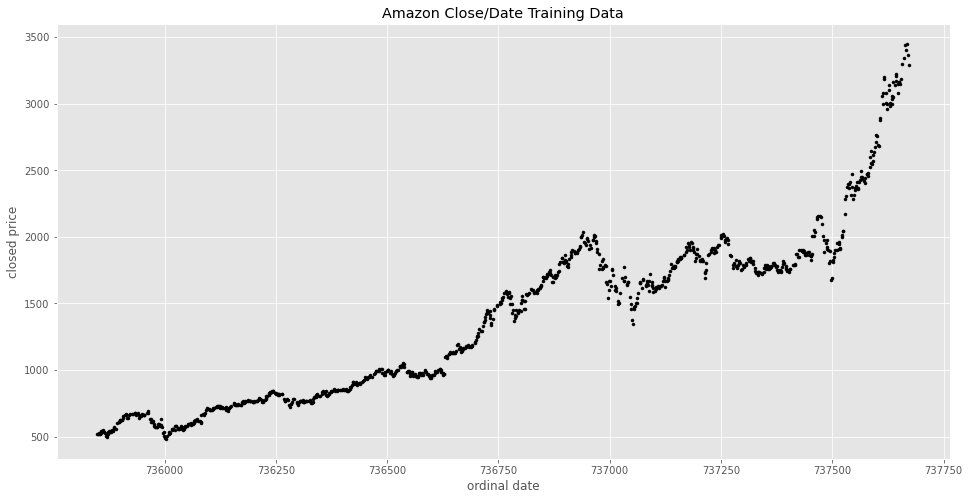

In [28]:
plt.figure(figsize=(16,8))
plt.title('Amazon Close/Date Training Data')
plt.scatter(date_train, close_train, marker='.', c='black')
plt.xlabel('ordinal date')
plt.ylabel('closed price')

Selecting Linear Regression model for first attempt, first trying with numpy

In [29]:
# using Normal Equation with numpy, 
# first step : creating matrix with closed price 

X_b = np.c_[np.ones((len(date_train), 1)), date_train]
X_b

array([[1.00000e+00, 7.36200e+05],
       [1.00000e+00, 7.36593e+05],
       [1.00000e+00, 7.37250e+05],
       ...,
       [1.00000e+00, 7.37488e+05],
       [1.00000e+00, 7.37096e+05],
       [1.00000e+00, 7.37482e+05]])

In [30]:
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(close_train)

In [31]:
theta

array([-8.36048483e+05,  1.13664737e+00])

Now trying with scikit learns built in linear regression package, this packages uses SVD(singular value decomposition) instead of other algorithms like gradient descent or normal equation because of speed and accuracy. This same algorithm is used in NLP and recommendation systems 

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [33]:
lin_reg = LinearRegression()

In [34]:
date_train_b = date_train.reshape(-1, 1)
close_train_b = close_train.reshape(-1, 1)

In [35]:
df_date_b = df_amazon['begins_at'].values.reshape(-1, 1)
df_close_b = df_amazon['close_price'].values.reshape(-1, 1)

In [36]:
# lin_reg.fit(date_train_b, close_train_b)
lin_reg.fit(df_date_b, df_close_b)

LinearRegression()

In [37]:
lin_reg.intercept_, lin_reg.coef_

(array([-842463.47769648]), array([[1.1453591]]))

In [38]:
print("The linear model is: Y = {:.5} + {:.5}X".format(lin_reg.intercept_[0], lin_reg.coef_[0][0]))

The linear model is: Y = -8.4246e+05 + 1.1454X


In [39]:
# predictions = lin_reg.predict(date_train_b)
predictions = lin_reg.predict(df_date_b)

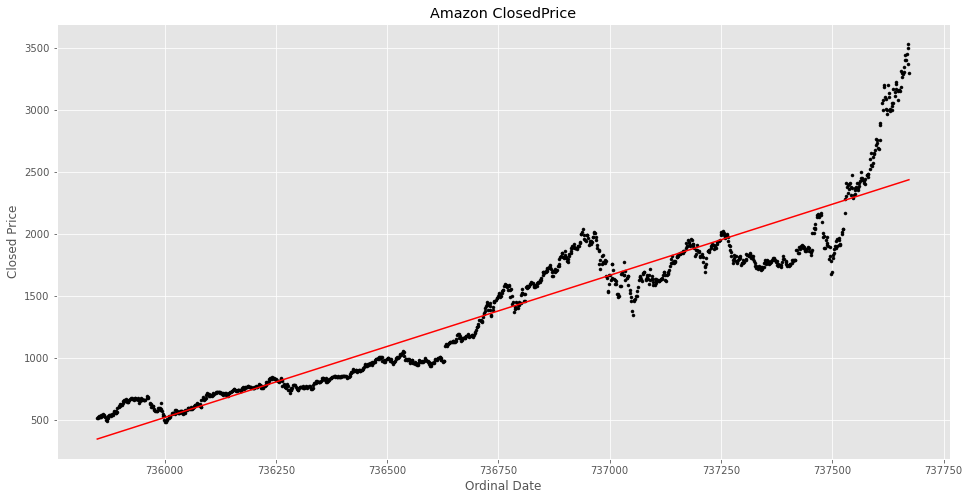

In [40]:
plt.figure(figsize=(16,8))
plt.title('Amazon ClosedPrice')
plt.scatter(
#     date_train,
    df_amazon['begins_at'],
#     close_train,
    df_amazon['close_price'],
    marker='.',
    c='black'
)
plt.plot(
#     date_train,
    df_amazon['begins_at'],
    predictions,
    c='red'
)
plt.xlabel("Ordinal Date")
plt.ylabel("Closed Price")
plt.show()

In [41]:
X = df_amazon['begins_at']
y = df_amazon['close_price']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            close_price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     8663.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:34:27   Log-Likelihood:                -8641.1
No. Observations:                1260   AIC:                         1.729e+04
Df Residuals:                    1258   BIC:                         1.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.425e+05   9066.263    -92.923      0.0

In [42]:
predictions

array([[ 347.86775227],
       [ 349.01311137],
       [ 350.15847046],
       ...,
       [2433.56666613],
       [2434.71202522],
       [2435.85738432]])

This looks pretty good the r squared value is close to 1 and the F statistic is well over 1, however this data is not in a straight line will be trying this same metod with polynomial regression